# Лабораторная работа №9. Дифференцирование и интегрирование

In [87]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate
from thinkdsp import TriangleSignal
from thinkdsp import SquareSignal
from thinkdsp import SawtoothSignal
from thinkdsp import CubicSignal
from thinkdsp import zero_pad
from thinkdsp import Wave

## Упражнение 9.2

Создадим треугольный сигнал и применим к нему diff и differentiate.

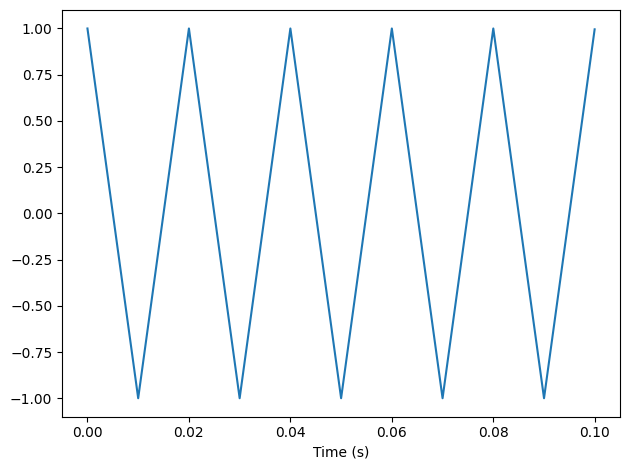

In [88]:
trig = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
trig.plot()
decorate(xlabel='Time (s)')

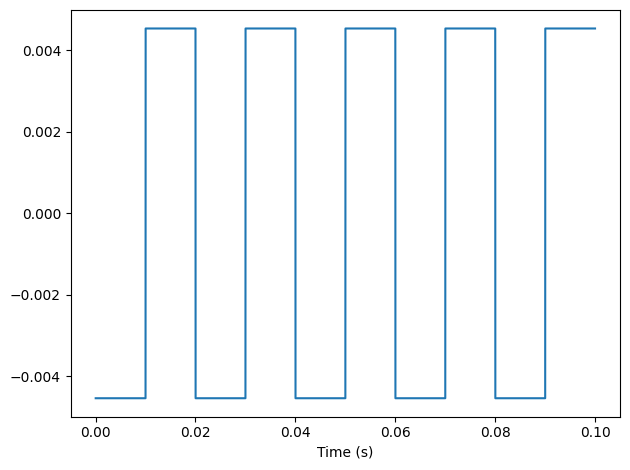

In [89]:
trig_diff = trig.diff()
trig_diff.plot()
decorate(xlabel='Time (s)')

Diff треугольного сигнала -- это прямоугольный сигнал
Теперь сравним полученный результат с функцией differentiate

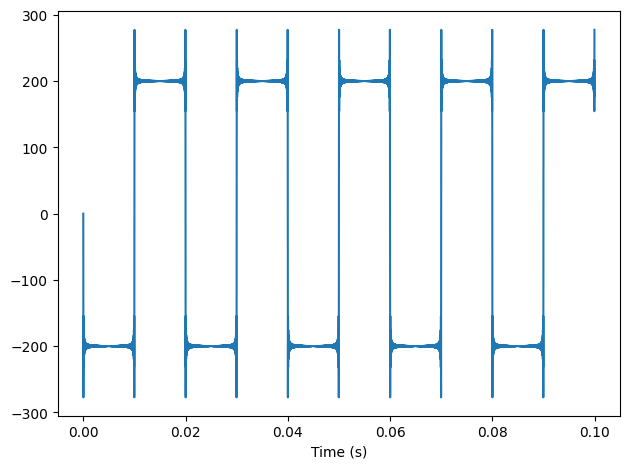

In [90]:
trig_differentiate = trig.make_spectrum().differentiate().make_wave()
trig_differentiate.plot()
decorate(xlabel='Time (s)')

Результат функции differentiate напоминает приближение прямоугольного сигнала рядом Фурье. Это происходит потому, что в точках перелома треугольника производная сигнала не определена.

## Упражнение 9.3

СОздадим прямоугольный сигнал и применим к нему cumsum

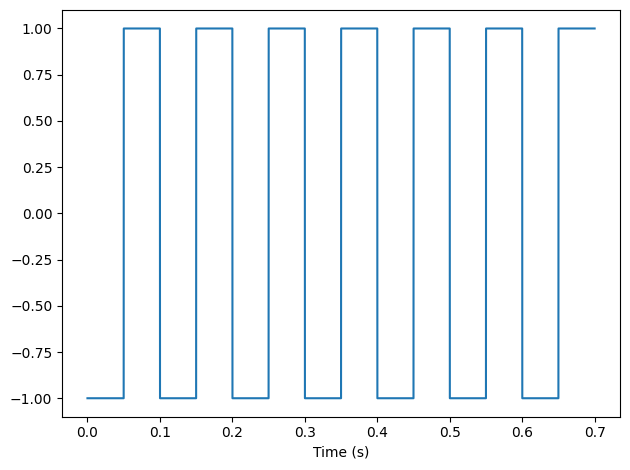

In [91]:
square = SquareSignal(freq=10).make_wave(duration=0.70, framerate=44100)
square.plot()
decorate(xlabel='Time (s)')

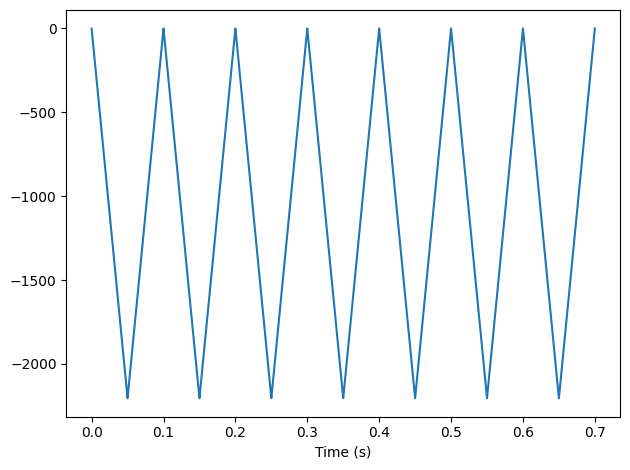

In [92]:
cumsum = square.cumsum()
cumsum.plot()
decorate(xlabel='Time (s)')

Cumsum для прямоугольного сигнала -- это треугольный сигнал. Теперь вычислим спектр треугольного сигнала и применим integrate

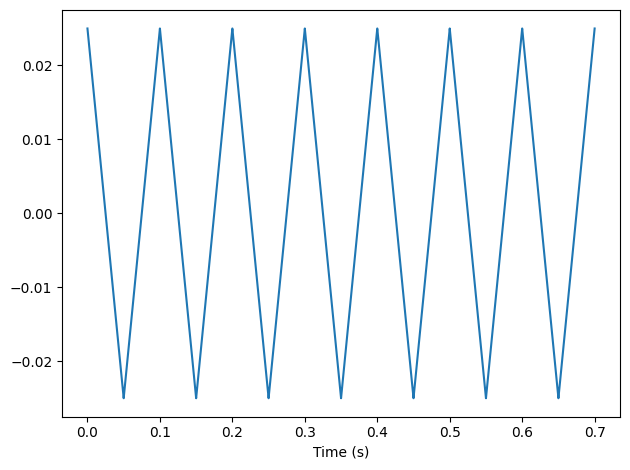

In [93]:
integrate = square.make_spectrum().integrate()
integrate.hs[0] = 0
wave2 = integrate.make_wave()
wave2.plot()
decorate(xlabel='Time (s)')

Сигналы одинаковы по форме, но отличаются по абсолютным значениям

## Упражнение 9.4

Создадим пилообразный сигнал и дважды применим к нему integrate.

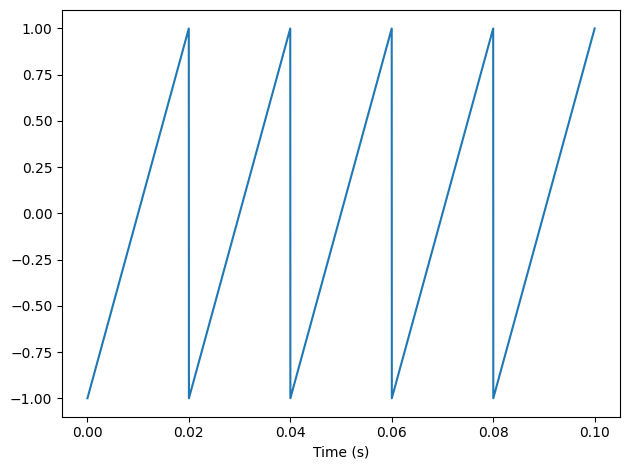

In [94]:
sawtooth = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
sawtooth.plot()
decorate(xlabel='Time (s)')

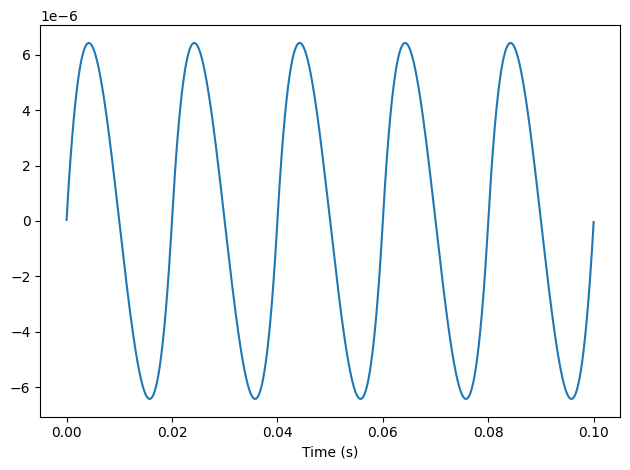

In [95]:
spectrum = sawtooth.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
wave2 = spectrum.make_wave()
wave2.plot()
decorate(xlabel='Time (s)')

Сигнал напоминает синусоиду, напечатаем спектр обоих сигналов

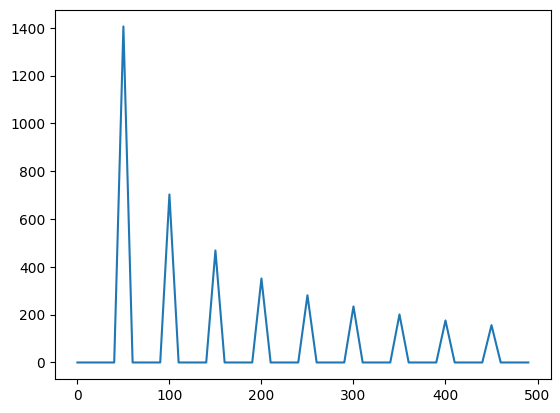

In [96]:
spectrum = sawtooth.make_spectrum()
spectrum.plot(high=500)

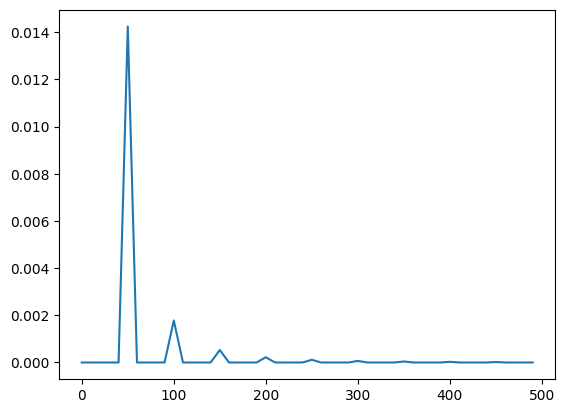

In [97]:
wave2.make_spectrum().plot(high=500)

По спектрам становится понятно, что двойное интегрирование действует как фильтр низких частот.

## Упражнение 9.5

Создадим cubic signal и вычислим вторую разность

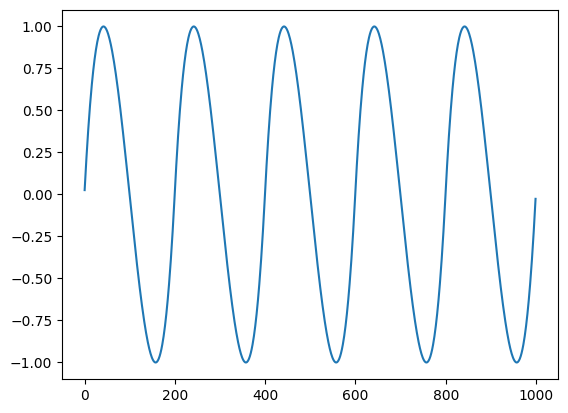

In [98]:
sawtooth = CubicSignal(freq=0.005).make_wave(duration=1000, framerate=1)
sawtooth.plot()

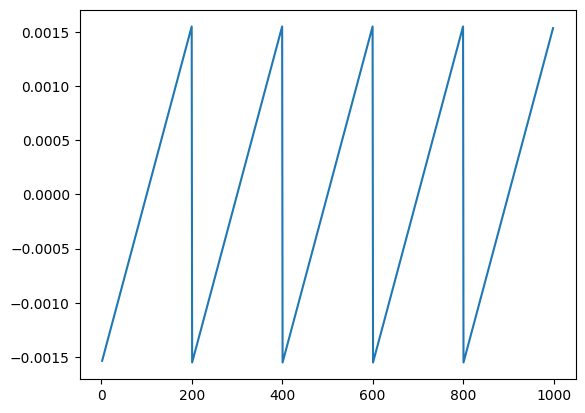

In [99]:
wave1 = sawtooth.diff().diff()
wave1.plot()

Получаем пилообразный сигнал

Далее вычислим вторую производную

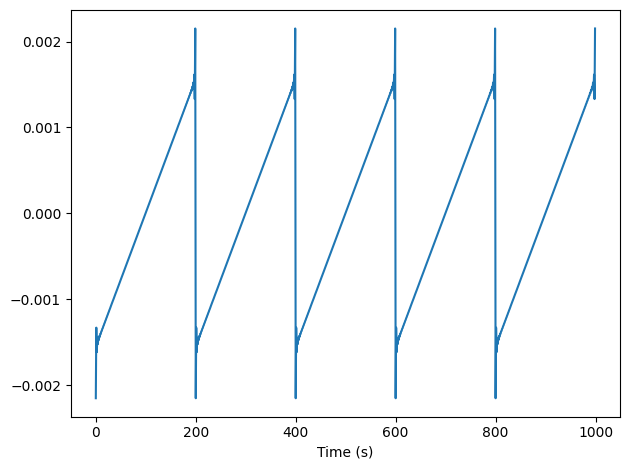

In [100]:
spectrum = sawtooth.make_spectrum().differentiate().differentiate()
wave2 = spectrum.make_wave()
wave2.plot()
decorate(xlabel='Time (s)')

Чтобы найти фильтр второй разницы, необходимо вычислить ДПФ окна -1, 2, -1.

Чтобы найти фильтр второй производной, необходимо вычислить фильтр первой производной и возвести его в квадрат.

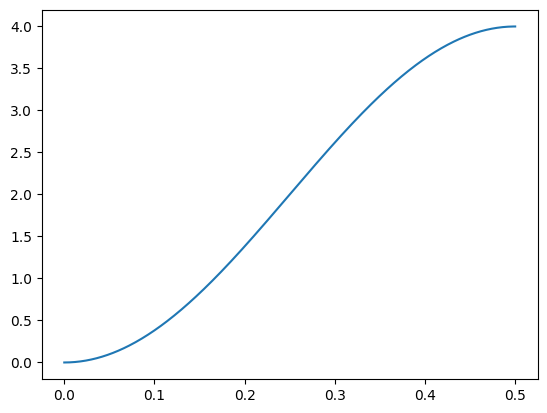

In [101]:

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(sawtooth))
diff_wave = Wave(padded, framerate=sawtooth.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

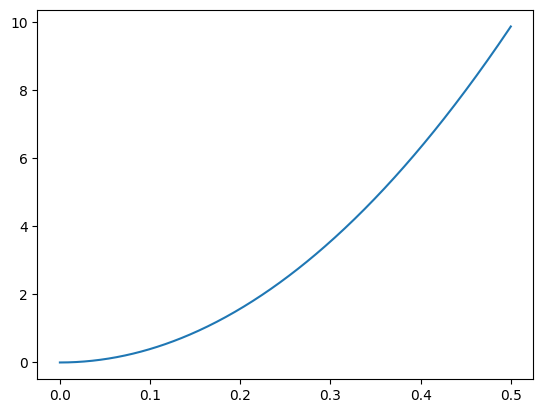

In [102]:
deriv_filter = sawtooth.make_spectrum()
deriv_filter.hs = (np.pi * 2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

Данные фильтры - фильтры ВЧ. Они усиливают компоненты самых высоких частот. Вторая разница - хорошее приближение второй производной только на самых низких частотах, затем она существенно отклоняется.